In [ ]:
pip install control

In [1]:
import control

In [2]:
s = control.tf('s')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('FO.xlsx')

In [5]:
df.describe()

,t,y
count,1501.000000,1501.000000
mean,750.000000,17.329912
std,433.445691,4.434647
min,0.000000,0.000000
25%,375.000000,16.932901
50%,750.000000,19.529645
75%,1125.000000,19.927869
max,1500.000000,19.988938


In [6]:
Max_t = df['t'].max()

In [7]:
Delta_t = df._get_value(1, 't') - df._get_value(0, 't')

In [8]:
Count_t = len(df['t'])

## Optimize

In [9]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [10]:
def fun(x):
    global df
    
    Kp = x[0]
    Tau = x[1]
    sys = Kp/(Tau*s +1) 
    
    # Simulate step response
    t_fun, y_fun = control.step_response(sys, T=Max_t, T_num=Count_t)
    df_fun = pd.DataFrame({'t_fun':t_fun, 'y_fun':y_fun})
    
    mse = mean_squared_error(df_fun['y_fun'], df['y'])
    return mse

In [11]:
x0 = [1, 1]

In [12]:
res = minimize(fun, x0, method='Powell', tol=1e-6)

In [13]:
Kp_opt = res.x[0]
Tau_opt = res.x[1]
sys_opt = Kp_opt/(Tau_opt*s +1) 

In [14]:
print('Kp=', Kp_opt)
print('Tau=', Tau_opt)

Kp= 20.000000000000114
Tau= 200.0000000000085


## Plots

In [15]:
t_opt, y_opt = control.step_response(sys_opt, T=Max_t, T_num=Count_t)

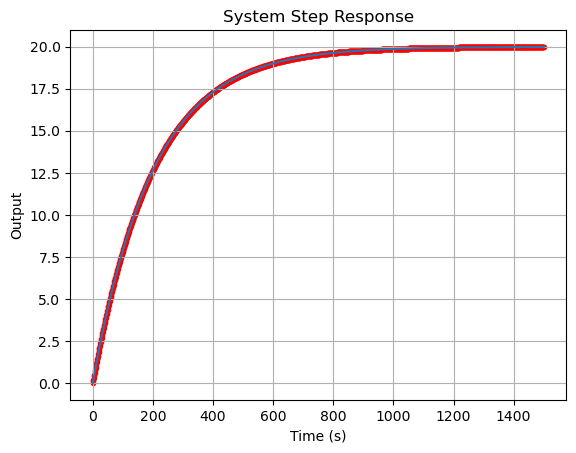

In [16]:
# Plot step response
plt.plot(t_opt,y_opt)
plt.scatter(df['t'], df['y'], marker= ".", color = "red")
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()